In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [2]:
data = pd.read_csv('ENB2012_data.csv')

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


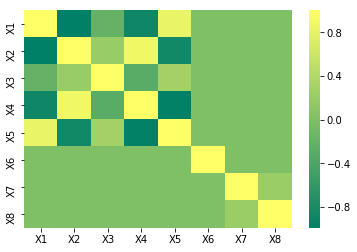

In [5]:
sns.heatmap(data.drop(['Y1','Y2'],axis=1).corr(),cmap='summer')

In [6]:
X = data.drop(['Y1','Y2','X1','X2','X4'],axis=1)
y1 = data['Y1']
y2 = data['Y2']

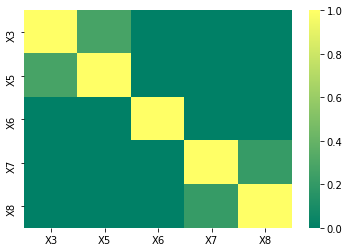

In [7]:
sns.heatmap(X.corr(),cmap='summer')

In [8]:
#creating train and test datasets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.1, random_state=101)

In [9]:
#scaling the data with minmax scaler
min_max = MinMaxScaler()
X_train_scaled = min_max.fit_transform(X_train)
X_test_scaled = min_max.transform(X_test)

### KNN

In [10]:
knnreg1 = KNeighborsRegressor()

param_grid = {'n_neighbors':[1,5,7,11,15,17,21]}
grid_search = GridSearchCV(knnreg1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best N: {}'.format(grid_search.best_params_))
print('best cross validation score : {0:0.4f}'.format(grid_search.best_score_))

knnreg1 = KNeighborsRegressor(n_neighbors = grid_search.best_params_['n_neighbors'])
knnreg1.fit(X_train_scaled, y1_train)
knnreg1_pred_y1train = knnreg1.predict(X_train_scaled)
knnreg1_pred_y1test = knnreg1.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y1_train, knnreg1_pred_y1train)))
print('Test r2: {:.3f}'.format(r2_score(y1_test, knnreg1_pred_y1test)))

best N: {'n_neighbors': 17}
best cross validation score : 0.9140
Train r2: 0.919
Test r2: 0.912


In [11]:
#Bagging
bag_knnreg1 = BaggingRegressor(knnreg1, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_knnreg1.fit(X_train_scaled,y1_train)
print('Out of bag score: {0:0.4f}'.format(bag_knnreg1.oob_score_))
bag_knnreg1_pred_y1train = bag_knnreg1.predict(X_train_scaled)
bag_knnreg1_pred_y1test = bag_knnreg1.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y1_train, bag_knnreg1_pred_y1train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y1_test, bag_knnreg1_pred_y1test)))

#Pasting
paste_knnreg1 = BaggingRegressor(knnreg1, bootstrap = False, n_estimators=100,random_state=101)
paste_knnreg1.fit(X_train_scaled,y1_train)
paste_knnreg1_pred_y1train = paste_knnreg1.predict(X_train_scaled)
paste_knnreg1_pred_y1test = paste_knnreg1.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y1_train, paste_knnreg1_pred_y1train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y1_test, paste_knnreg1_pred_y1test)))

Out of bag score: 0.9116
Bagging Train r2: 0.922
Bagging Test r2: 0.919
Pasting Train r2: 0.919
Pasting Test r2: 0.912


In [12]:
#Boosting
adaboost_knnreg1 = AdaBoostRegressor(base_estimator = knnreg1,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_knnreg1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.4f}'.format(grid_search.best_score_))

adaboost_knnreg1 = AdaBoostRegressor(base_estimator = knnreg1, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_knnreg1.fit(X_train_scaled, y1_train)
adaboost_knnreg1_pred_y1train = adaboost_knnreg1.predict(X_train_scaled)
adaboost_knnreg1_pred_y1test = adaboost_knnreg1.predict(X_test_scaled)
print('Boosting Train r2: {:.2f}'.format(r2_score(y1_train, adaboost_knnreg1_pred_y1train)))
print('Boosting Test r2: {:.2f}'.format(r2_score(y1_test, adaboost_knnreg1_pred_y1test)))

best learning_rate: 0.5
best n_estimators: 50
best train-set score : 0.9220
Boosting Train r2: 0.94
Boosting Test r2: 0.94


In [13]:
knnreg2 = KNeighborsRegressor()

param_grid = {'n_neighbors':[1,5,7,11,15,17,21]}
grid_search = GridSearchCV(knnreg2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best N: {}'.format(grid_search.best_params_))
print('best cross validation score : {0:0.3f}'.format(grid_search.best_score_))

knnreg2 = KNeighborsRegressor(n_neighbors = grid_search.best_params_['n_neighbors'])
knnreg2.fit(X_train_scaled, y2_train)
knnreg2_pred_y2train = knnreg2.predict(X_train_scaled)
knnreg2_pred_y2test = knnreg2.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y2_train, knnreg2_pred_y2train)))
print('Test r2: {:.3f}'.format(r2_score(y2_test, knnreg2_pred_y2test)))

best N: {'n_neighbors': 21}
best cross validation score : 0.890
Train r2: 0.902
Test r2: 0.901


In [14]:
#Bagging
bag_knnreg2 = BaggingRegressor(knnreg2, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_knnreg2.fit(X_train_scaled,y2_train)
print('Out of bag score: {0:0.4f}'.format(bag_knnreg2.oob_score_))
bag_knnreg2_pred_y2train = bag_knnreg2.predict(X_train_scaled)
bag_knnreg2_pred_y2test = bag_knnreg2.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y2_train, bag_knnreg2_pred_y2train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y2_test, bag_knnreg2_pred_y2test)))

#Pasting
paste_knnreg2 = BaggingRegressor(knnreg2, bootstrap = False, n_estimators=100,random_state=101)
paste_knnreg2.fit(X_train_scaled,y2_train)
paste_knnreg2_pred_y2train = paste_knnreg2.predict(X_train_scaled)
paste_knnreg2_pred_y2test = paste_knnreg2.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y2_train, paste_knnreg2_pred_y2train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y2_test, paste_knnreg2_pred_y2test)))

Out of bag score: 0.8887
Bagging Train r2: 0.900
Bagging Test r2: 0.900
Pasting Train r2: 0.902
Pasting Test r2: 0.901


In [15]:
#Boosting
adaboost_knnreg2 = AdaBoostRegressor(base_estimator = knnreg2,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_knnreg2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_knnreg2 = AdaBoostRegressor(base_estimator = knnreg2, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_knnreg2.fit(X_train_scaled, y2_train)
adaboost_knnreg2_pred_y2train = adaboost_knnreg2.predict(X_train_scaled)
adaboost_knnreg2_pred_y2test = adaboost_knnreg2.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y2_train, adaboost_knnreg2_pred_y2train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y2_test, adaboost_knnreg2_pred_y2test)))

best learning_rate: 0.1
best n_estimators: 50
best train-set score : 0.892
Boosting Train r2: 0.902
Boosting Test r2: 0.905


### Linear Regression

In [16]:
lm1 = LinearRegression()
lm1.fit(X_train_scaled, y1_train)
lm1_pred_y1train = lm1.predict(X_train_scaled)
lm1_pred_y1test = lm1.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y1_train, lm1_pred_y1train)))
print('Test r2: {:.3f}'.format(r2_score(y1_test, lm1_pred_y1test)))

Train r2: 0.910
Test r2: 0.916


In [17]:
#Bagging
bag_lm1 = BaggingRegressor(lm1, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_lm1.fit(X_train_scaled,y1_train)
print('Out of bag score: {0:0.3f}'.format(bag_lm1.oob_score_))
bag_lm1_pred_y1train = bag_lm1.predict(X_train_scaled)
bag_lm1_pred_y1test = bag_lm1.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y1_train, bag_lm1_pred_y1train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y1_test, bag_lm1_pred_y1test)))

#Pasting
paste_lm1 = BaggingRegressor(lm1, bootstrap = False, n_estimators=100,random_state=101)
paste_lm1.fit(X_train_scaled,y1_train)
paste_lm1_pred_y1train = paste_lm1.predict(X_train_scaled)
paste_lm1_pred_y1test = paste_lm1.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y1_train, paste_lm1_pred_y1train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y1_test, paste_lm1_pred_y1test)))

Out of bag score: 0.909
Bagging Train r2: 0.910
Bagging Test r2: 0.915
Pasting Train r2: 0.910
Pasting Test r2: 0.916


In [18]:
#Boosting
adaboost_lm1 = AdaBoostRegressor(base_estimator = lm1,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_lm1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_lm1 = AdaBoostRegressor(base_estimator = lm1, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_lm1.fit(X_train_scaled, y1_train)
adaboost_lm1_pred_y1train = adaboost_lm1.predict(X_train_scaled)
adaboost_lm1_pred_y1test = adaboost_lm1.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y1_train, adaboost_lm1_pred_y1train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y1_test, adaboost_lm1_pred_y1test)))

best learning_rate: 0.5
best n_estimators: 50
best train-set score : 0.907
Boosting Train r2: 0.909
Boosting Test r2: 0.913


In [19]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y2_train)
lm2_pred_y2train = lm2.predict(X_train_scaled)
lm2_pred_y2test = lm2.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y2_train, lm2_pred_y2train)))
print('Test r2: {:.3f}'.format(r2_score(y2_test, lm2_pred_y2test)))

Train r2: 0.877
Test r2: 0.895


In [20]:
#Bagging
bag_lm2 = BaggingRegressor(lm2, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_lm2.fit(X_train_scaled,y2_train)
print('Out of bag score: {0:0.3f}'.format(bag_lm2.oob_score_))
bag_lm2_pred_y2train = bag_lm2.predict(X_train_scaled)
bag_lm2_pred_y2test = bag_lm2.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y2_train, bag_lm2_pred_y2train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y2_test, bag_lm2_pred_y2test)))

#Pasting
paste_lm2 = BaggingRegressor(lm2, bootstrap = False, n_estimators=100,random_state=101)
paste_lm2.fit(X_train_scaled,y2_train)
paste_lm2_pred_y2train = paste_lm2.predict(X_train_scaled)
paste_lm2_pred_y2test = paste_lm2.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y2_train, paste_lm2_pred_y2train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y2_test, paste_lm2_pred_y2test)))

Out of bag score: 0.875
Bagging Train r2: 0.877
Bagging Test r2: 0.895
Pasting Train r2: 0.877
Pasting Test r2: 0.895


In [21]:
#Boosting
adaboost_lm2 = AdaBoostRegressor(base_estimator = lm2,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_lm2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_lm2 = AdaBoostRegressor(base_estimator = lm2, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_lm2.fit(X_train_scaled, y2_train)
adaboost_lm2_pred_y2train = adaboost_lm2.predict(X_train_scaled)
adaboost_lm2_pred_y2test = adaboost_lm2.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y2_train, adaboost_lm2_pred_y2train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y2_test, adaboost_lm2_pred_y2test)))

best learning_rate: 0.5
best n_estimators: 50
best train-set score : 0.870
Boosting Train r2: 0.873
Boosting Test r2: 0.896


### Ridge Regression

In [22]:
ridge1 = Ridge()

param_grid = {'alpha':[0.01,0.05,1,5,10,50,100]}
grid_search = GridSearchCV(ridge1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best alpha: {}'.format(grid_search.best_params_))
print('best cross validation score : {0:0.3f}'.format(grid_search.best_score_))

ridge1 = Ridge(alpha=grid_search.best_params_['alpha'])
ridge1.fit(X_train_scaled, y1_train)
ridge1_pred_y1train = ridge1.predict(X_train_scaled)
ridge1_pred_y1test = ridge1.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y1_train, ridge1_pred_y1train)))
print('Test r2: {:.3f}'.format(r2_score(y1_test, ridge1_pred_y1test)))

best alpha: {'alpha': 0.05}
best cross validation score : 0.909
Train r2: 0.910
Test r2: 0.916


In [23]:
#Bagging
bag_ridge1 = BaggingRegressor(ridge1, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_ridge1.fit(X_train_scaled,y1_train)
print('Out of bag score: {0:0.4f}'.format(bag_ridge1.oob_score_))
bag_ridge1_pred_y1train = bag_ridge1.predict(X_train_scaled)
bag_ridge1_pred_y1test = bag_ridge1.predict(X_test_scaled)
print('Bagging Train r2: {:.2f}'.format(r2_score(y1_train, bag_ridge1_pred_y1train)))
print('Bagging Test r2: {:.2f}'.format(r2_score(y1_test, bag_ridge1_pred_y1test)))

#Pasting
paste_ridge1 = BaggingRegressor(ridge1, bootstrap = False, n_estimators=100,random_state=101)
paste_ridge1.fit(X_train_scaled,y1_train)
paste_ridge1_pred_y1train = paste_ridge1.predict(X_train_scaled)
paste_ridge1_pred_y1test = paste_ridge1.predict(X_test_scaled)
print('Pasting Train r2: {:.2f}'.format(r2_score(y1_train, paste_ridge1_pred_y1train)))
print('Pasting Test r2: {:.2f}'.format(r2_score(y1_test, paste_ridge1_pred_y1test)))

Out of bag score: 0.9086
Bagging Train r2: 0.91
Bagging Test r2: 0.92
Pasting Train r2: 0.91
Pasting Test r2: 0.92


In [24]:
#Boosting
adaboost_ridge1 = AdaBoostRegressor(base_estimator = ridge1,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_ridge1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_ridge1 = AdaBoostRegressor(base_estimator = ridge1, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_ridge1.fit(X_train_scaled, y1_train)
adaboost_ridge1_pred_y1train = adaboost_ridge1.predict(X_train_scaled)
adaboost_ridge1_pred_y1test = adaboost_ridge1.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y1_train, adaboost_ridge1_pred_y1train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y1_test, adaboost_ridge1_pred_y1test)))

best learning_rate: 0.1
best n_estimators: 50
best train-set score : 0.907
Boosting Train r2: 0.909
Boosting Test r2: 0.913


In [25]:
ridge2 = Ridge()

param_grid = {'alpha':[0.01,0.05,1,5,10,50,100]}
grid_search = GridSearchCV(ridge2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best alpha: {}'.format(grid_search.best_params_))
print('best cross validation score : {0:0.3f}'.format(grid_search.best_score_))

ridge2 = Ridge(alpha=grid_search.best_params_['alpha'])
ridge2.fit(X_train_scaled, y2_train)
ridge2_pred_y2train = ridge2.predict(X_train_scaled)
ridge2_pred_y2test = ridge2.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y2_train, ridge2_pred_y2train)))
print('Test r2: {:.3f}'.format(r2_score(y2_test, ridge2_pred_y2test)))

best alpha: {'alpha': 0.05}
best cross validation score : 0.875
Train r2: 0.877
Test r2: 0.895


In [26]:
#Bagging
bag_ridge2 = BaggingRegressor(ridge2, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_ridge2.fit(X_train_scaled,y2_train)
print('Out of bag score: {0:0.3f}'.format(bag_ridge2.oob_score_))
bag_ridge2_pred_y2train = bag_ridge2.predict(X_train_scaled)
bag_ridge2_pred_y2test = bag_ridge2.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y2_train, bag_ridge2_pred_y2train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y2_test, bag_ridge2_pred_y2test)))

#Pasting
paste_ridge2 = BaggingRegressor(ridge2, bootstrap = False, n_estimators=100,random_state=101)
paste_ridge2.fit(X_train_scaled,y2_train)
paste_ridge2_pred_y2train = paste_ridge2.predict(X_train_scaled)
paste_ridge2_pred_y2test = paste_ridge2.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y2_train, paste_ridge2_pred_y2train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y2_test, paste_ridge2_pred_y2test)))

Out of bag score: 0.875
Bagging Train r2: 0.877
Bagging Test r2: 0.895
Pasting Train r2: 0.877
Pasting Test r2: 0.895


In [27]:
#Boosting
adaboost_ridge2 = AdaBoostRegressor(base_estimator = ridge2,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_ridge2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_ridge2 = AdaBoostRegressor(base_estimator = ridge2, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_ridge2.fit(X_train_scaled, y2_train)
adaboost_ridge2_pred_y2train = adaboost_ridge2.predict(X_train_scaled)
adaboost_ridge2_pred_y2test = adaboost_ridge2.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y2_train, adaboost_ridge2_pred_y2train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y2_test, adaboost_ridge2_pred_y2test)))

best learning_rate: 0.5
best n_estimators: 50
best train-set score : 0.870
Boosting Train r2: 0.874
Boosting Test r2: 0.896


### LASSO Regression

In [28]:
lasso1 = Lasso()

param_grid = {'alpha':[0.01,0.05,1,5,10,50,100]}
grid_search = GridSearchCV(lasso1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best alpha: {}'.format(grid_search.best_params_))
print('best cross validation score : {0:0.3f}'.format(grid_search.best_score_))

lasso1 = Lasso(alpha=grid_search.best_params_['alpha'])
lasso1.fit(X_train_scaled, y1_train)
lasso1_pred_y1train = lasso1.predict(X_train_scaled)
lasso1_pred_y1test = lasso1.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y1_train, lasso1_pred_y1train)))
print('Test r2: {:.3f}'.format(r2_score(y1_test, lasso1_pred_y1test)))

best alpha: {'alpha': 0.01}
best cross validation score : 0.909
Train r2: 0.910
Test r2: 0.916


In [29]:
#Bagging
bag_lasso1 = BaggingRegressor(lasso1, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_lasso1.fit(X_train_scaled,y1_train)
print('Out of bag score: {0:0.3f}'.format(bag_lasso1.oob_score_))
bag_lasso1_pred_y1train = bag_lasso1.predict(X_train_scaled)
bag_lasso1_pred_y1test = bag_lasso1.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y1_train, bag_lasso1_pred_y1train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y1_test, bag_lasso1_pred_y1test)))

#Pasting
paste_lasso1 = BaggingRegressor(lasso1, bootstrap = False, n_estimators=100,random_state=101)
paste_lasso1.fit(X_train_scaled,y1_train)
paste_lasso1_pred_y1train = paste_lasso1.predict(X_train_scaled)
paste_lasso1_pred_y1test = paste_lasso1.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y1_train, paste_lasso1_pred_y1train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y1_test, paste_lasso1_pred_y1test)))

Out of bag score: 0.909
Bagging Train r2: 0.910
Bagging Test r2: 0.916
Pasting Train r2: 0.910
Pasting Test r2: 0.916


In [30]:
#Boosting
adaboost_lasso1 = AdaBoostRegressor(base_estimator = lasso1,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_lasso1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_lasso1 = AdaBoostRegressor(base_estimator = lasso1, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_lasso1.fit(X_train_scaled, y1_train)
adaboost_lasso1_pred_y1train = adaboost_lasso1.predict(X_train_scaled)
adaboost_lasso1_pred_y1test = adaboost_lasso1.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y1_train, adaboost_lasso1_pred_y1train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y1_test, adaboost_lasso1_pred_y1test)))

best learning_rate: 0.5
best n_estimators: 50
best train-set score : 0.908
Boosting Train r2: 0.909
Boosting Test r2: 0.912


In [31]:
lasso2 = Lasso()

param_grid = {'alpha':[0.01,0.05,1,5,10,50,100]}
grid_search = GridSearchCV(lasso2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best alpha: {}'.format(grid_search.best_params_))
print('best cross validation score : {0:0.3f}'.format(grid_search.best_score_))

lasso2 = Lasso(alpha=grid_search.best_params_['alpha'])
lasso2.fit(X_train_scaled, y2_train)
lasso2_pred_y2train = lasso2.predict(X_train_scaled)
lasso2_pred_y2test = lasso2.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y2_train, lasso2_pred_y2train)))
print('Test r2: {:.3f}'.format(r2_score(y2_test, lasso2_pred_y2test)))

best alpha: {'alpha': 0.01}
best cross validation score : 0.875
Train r2: 0.877
Test r2: 0.895


In [32]:
#Bagging
bag_lasso2 = BaggingRegressor(lasso2, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_lasso2.fit(X_train_scaled,y2_train)
print('Out of bag score: {0:0.3f}'.format(bag_lasso2.oob_score_))
bag_lasso2_pred_y2train = bag_lasso2.predict(X_train_scaled)
bag_lasso2_pred_y2test = bag_lasso2.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y2_train, bag_lasso2_pred_y2train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y2_test, bag_lasso2_pred_y2test)))

#Pasting
paste_lasso2 = BaggingRegressor(lasso2, bootstrap = False, n_estimators=100,random_state=101)
paste_lasso2.fit(X_train_scaled,y2_train)
paste_lasso2_pred_y2train = paste_lasso2.predict(X_train_scaled)
paste_lasso2_pred_y2test = paste_lasso2.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y2_train, paste_lasso2_pred_y2train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y2_test, paste_lasso2_pred_y2test)))

Out of bag score: 0.875
Bagging Train r2: 0.877
Bagging Test r2: 0.895
Pasting Train r2: 0.877
Pasting Test r2: 0.895


In [33]:
#Boosting
adaboost_lasso2 = AdaBoostRegressor(base_estimator = lasso2,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_lasso2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_lasso2 = AdaBoostRegressor(base_estimator = lasso2, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_lasso2.fit(X_train_scaled, y2_train)
adaboost_lasso2_pred_y2train = adaboost_lasso2.predict(X_train_scaled)
adaboost_lasso2_pred_y2test = adaboost_lasso2.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y2_train, adaboost_lasso2_pred_y2train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y2_test, adaboost_lasso2_pred_y2test)))

best learning_rate: 0.5
best n_estimators: 50
best train-set score : 0.871
Boosting Train r2: 0.874
Boosting Test r2: 0.896


### SVR Linear

In [34]:
svm1 = SVR(kernel = 'linear')
param_grid = {'C': [0.1,0.5,1,5,10,50,100],
              'epsilon': [0.01,0.05,1,5,10,50,100]}
grid_search = GridSearchCV(svm1, param_grid, cv=5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best C: {}'.format(grid_search.best_params_['C']))
print('best epsilon: {}'.format(grid_search.best_params_['epsilon']))
print('best cross validation score : {0:0.3f}'.format(grid_search.best_score_))

svm1 = SVR(kernel = 'linear',epsilon=grid_search.best_params_['epsilon'],C=grid_search.best_params_['C'])
svm1.fit(X_train_scaled, y1_train)
svm1_pred_y1train = svm1.predict(X_train_scaled)
svm1_pred_y1test = svm1.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y1_train, svm1_pred_y1train)))
print('Test r2: {:.3f}'.format(r2_score(y1_test, svm1_pred_y1test)))

best C: 100
best epsilon: 0.05
best cross validation score : 0.908
Train r2: 0.908
Test r2: 0.919


In [35]:
#Bagging
bag_svm1 = BaggingRegressor(svm1, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_svm1.fit(X_train_scaled,y1_train)
print('Out of bag score: {0:0.3f}'.format(bag_svm1.oob_score_))
bag_svm1_pred_y1train = bag_svm1.predict(X_train_scaled)
bag_svm1_pred_y1test = bag_svm1.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y1_train, bag_svm1_pred_y1train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y1_test, bag_svm1_pred_y1test)))

#Pasting
paste_svm1 = BaggingRegressor(svm1, bootstrap = False, n_estimators=100,random_state=101)
paste_svm1.fit(X_train_scaled,y1_train)
paste_svm1_pred_y1train = paste_svm1.predict(X_train_scaled)
paste_svm1_pred_y1test = paste_svm1.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y1_train, paste_svm1_pred_y1train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y1_test, paste_svm1_pred_y1test)))

Out of bag score: 0.908
Bagging Train r2: 0.909
Bagging Test r2: 0.918
Pasting Train r2: 0.908
Pasting Test r2: 0.919


In [36]:
#Boosting
adaboost_svm1 = AdaBoostRegressor(base_estimator = svm1,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_svm1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_svm1 = AdaBoostRegressor(base_estimator = svm1, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_svm1.fit(X_train_scaled, y1_train)
adaboost_svm1_pred_y1train = adaboost_svm1.predict(X_train_scaled)
adaboost_svm1_pred_y1test = adaboost_svm1.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y1_train, adaboost_svm1_pred_y1train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y1_test, adaboost_svm1_pred_y1test)))

best learning_rate: 1.0
best n_estimators: 50
best train-set score : 0.910
Boosting Train r2: 0.910
Boosting Test r2: 0.914


In [37]:
svm2 = SVR(kernel = 'linear')
param_grid = {'C': [0.1,0.5,1,5,10,50,100],
              'epsilon': [0.01,0.05,1,5,10,50,100]}
grid_search = GridSearchCV(svm2, param_grid, cv=5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best C: {}'.format(grid_search.best_params_['C']))
print('best epsilon: {}'.format(grid_search.best_params_['epsilon']))
print('best cross validation score : {0:0.3f}'.format(grid_search.best_score_))

svm2 = SVR(kernel = 'linear',epsilon=grid_search.best_params_['epsilon'],C=grid_search.best_params_['C'])
svm2.fit(X_train_scaled, y2_train)
svm2_pred_y2train = svm2.predict(X_train_scaled)
svm2_pred_y2test = svm2.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y2_train, svm2_pred_y2train)))
print('Test r2: {:.3f}'.format(r2_score(y2_test, svm2_pred_y2test)))

best C: 50
best epsilon: 1
best cross validation score : 0.875
Train r2: 0.876
Test r2: 0.892


In [38]:
#Bagging
bag_svm2 = BaggingRegressor(svm2, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_svm2.fit(X_train_scaled,y2_train)
print('Out of bag score: {0:0.3f}'.format(bag_svm2.oob_score_))
bag_svm2_pred_y2train = bag_svm2.predict(X_train_scaled)
bag_svm2_pred_y2test = bag_svm2.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y2_train, bag_svm2_pred_y2train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y2_test, bag_svm2_pred_y2test)))

#Pasting
paste_svm2 = BaggingRegressor(svm2, bootstrap = False, n_estimators=100,random_state=101)
paste_svm2.fit(X_train_scaled,y2_train)
paste_svm2_pred_y2train = paste_svm2.predict(X_train_scaled)
paste_svm2_pred_y2test = paste_svm2.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y2_train, paste_svm2_pred_y2train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y2_test, paste_svm2_pred_y2test)))

Out of bag score: 0.874
Bagging Train r2: 0.876
Bagging Test r2: 0.891
Pasting Train r2: 0.876
Pasting Test r2: 0.892


In [39]:
#Boosting
adaboost_svm2 = AdaBoostRegressor(base_estimator = svm2,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_svm2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_svm2 = AdaBoostRegressor(base_estimator = svm2, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_svm2.fit(X_train_scaled, y2_train)
adaboost_svm2_pred_y2train = adaboost_svm2.predict(X_train_scaled)
adaboost_svm2_pred_y2test = adaboost_svm2.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y2_train, adaboost_svm2_pred_y2train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y2_test, adaboost_svm2_pred_y2test)))

best learning_rate: 0.1
best n_estimators: 100
best train-set score : 0.875
Boosting Train r2: 0.877
Boosting Test r2: 0.896


### SVR rbf

In [40]:
svm_rbf1 = SVR(kernel = 'rbf')
param_grid = {'C': [0.1,0.5,1,5,10,50,100],
              'epsilon': [0.01,0.05,1,5,10,50,100]}
grid_search = GridSearchCV(svm_rbf1, param_grid, cv=5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best C: {}'.format(grid_search.best_params_['C']))
print('best epsilon: {}'.format(grid_search.best_params_['epsilon']))
print('best cross validation score : {0:0.4f}'.format(grid_search.best_score_))

svm_rbf1 = SVR(kernel = 'linear',epsilon=grid_search.best_params_['epsilon'],C=grid_search.best_params_['C'])
svm_rbf1.fit(X_train_scaled, y1_train)
svm_rbf1_pred_y1train = svm_rbf1.predict(X_train_scaled)
svm_rbf1_pred_y1test = svm_rbf1.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y1_train, svm_rbf1_pred_y1train)))
print('Test r2: {:.3f}'.format(r2_score(y1_test, svm_rbf1_pred_y1test)))

best C: 100
best epsilon: 1
best cross validation score : 0.9369
Train r2: 0.909
Test r2: 0.918


In [41]:
#Bagging
bag_svm_rbf1 = BaggingRegressor(svm_rbf1, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_svm_rbf1.fit(X_train_scaled,y1_train)
print('Out of bag score: {0:0.3f}'.format(bag_svm_rbf1.oob_score_))
bag_svm_rbf1_pred_y1train = bag_svm_rbf1.predict(X_train_scaled)
bag_svm_rbf1_pred_y1test = bag_svm_rbf1.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y1_train, bag_svm_rbf1_pred_y1train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y1_test, bag_svm_rbf1_pred_y1test)))

#Pasting
paste_svm_rbf1 = BaggingRegressor(svm_rbf1, bootstrap = False, n_estimators=100,random_state=101)
paste_svm_rbf1.fit(X_train_scaled,y1_train)
paste_svm_rbf1_pred_y1train = paste_svm_rbf1.predict(X_train_scaled)
paste_svm_rbf1_pred_y1test = paste_svm_rbf1.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y1_train, paste_svm_rbf1_pred_y1train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y1_test, paste_svm_rbf1_pred_y1test)))

Out of bag score: 0.907
Bagging Train r2: 0.909
Bagging Test r2: 0.918
Pasting Train r2: 0.909
Pasting Test r2: 0.918


In [42]:
#Boosting
adaboost_svm_rbf1 = AdaBoostRegressor(base_estimator = svm_rbf1,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_svm_rbf1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_svm_rbf1 = AdaBoostRegressor(base_estimator = svm_rbf1, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_svm_rbf1.fit(X_train_scaled, y1_train)
adaboost_svm_rbf1_pred_y1train = adaboost_svm_rbf1.predict(X_train_scaled)
adaboost_svm_rbf1_pred_y1test = adaboost_svm_rbf1.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y1_train, adaboost_svm_rbf1_pred_y1train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y1_test, adaboost_svm_rbf1_pred_y1test)))

best learning_rate: 0.5
best n_estimators: 50
best train-set score : 0.909
Boosting Train r2: 0.910
Boosting Test r2: 0.914


In [43]:
svm_rbf2 = SVR(kernel = 'rbf')
param_grid = {'C': [0.1,0.5,1,5,10,50,100],
              'epsilon': [0.01,0.05,1,5,10,50,100]}
grid_search = GridSearchCV(svm_rbf2, param_grid, cv=5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best C: {}'.format(grid_search.best_params_['C']))
print('best epsilon: {}'.format(grid_search.best_params_['epsilon']))
print('best cross validation score : {0:0.3f}'.format(grid_search.best_score_))

svm_rbf2 = SVR(kernel = 'rbf',epsilon=grid_search.best_params_['epsilon'],C=grid_search.best_params_['C'])
svm_rbf2.fit(X_train_scaled, y2_train)
svm_rbf2_pred_y2train = svm_rbf2.predict(X_train_scaled)
svm_rbf2_pred_y2test = svm_rbf2.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y2_train, svm_rbf2_pred_y2train)))
print('Test r2: {:.3f}'.format(r2_score(y2_test, svm_rbf2_pred_y2test)))

best C: 100
best epsilon: 1
best cross validation score : 0.902
Train r2: 0.907
Test r2: 0.917


In [44]:
#bagging
bag_svm_rbf2 = BaggingRegressor(svm_rbf2, bootstrap = True, n_estimators=100,oob_score=True)
bag_svm_rbf2.fit(X_train_scaled,y2_train)
print('Out of bag score: {0:0.3f}'.format(bag_svm_rbf2.oob_score_))
bag_svm_rbf2_pred_y2train = bag_svm_rbf2.predict(X_train_scaled)
bag_svm_rbf2_pred_y2test = bag_svm_rbf2.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y2_train, bag_svm_rbf2_pred_y2train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y2_test, bag_svm_rbf2_pred_y2test)))

#Pasting
paste_svm_rbf2 = BaggingRegressor(svm_rbf2, bootstrap = False, n_estimators=100)
paste_svm_rbf2.fit(X_train_scaled,y2_train)
paste_svm_rbf2_pred_y2train = paste_svm_rbf2.predict(X_train_scaled)
paste_svm_rbf2_pred_y2test = paste_svm_rbf2.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y2_train, paste_svm_rbf2_pred_y2train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y2_test, paste_svm_rbf2_pred_y2test)))

Out of bag score: 0.903
Bagging Train r2: 0.907
Bagging Test r2: 0.916
Pasting Train r2: 0.907
Pasting Test r2: 0.917


In [45]:
#Boosting
adaboost_svm_rbf2 = AdaBoostRegressor(base_estimator = svm_rbf2,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_svm_rbf2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_svm_rbf2 = AdaBoostRegressor(base_estimator = svm_rbf2, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_svm_rbf2.fit(X_train_scaled, y2_train)
adaboost_svm_rbf2_pred_y2train = adaboost_svm_rbf2.predict(X_train_scaled)
adaboost_svm_rbf2_pred_y2test = adaboost_svm_rbf2.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y2_train, adaboost_svm_rbf2_pred_y2train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y2_test, adaboost_svm_rbf2_pred_y2test)))

best learning_rate: 0.1
best n_estimators: 100
best train-set score : 0.906
Boosting Train r2: 0.915
Boosting Test r2: 0.925


### Decision Tree

In [46]:
tree1 = DecisionTreeRegressor()
param_grid = {'max_depth': [2,3,4,5]}
grid_search = GridSearchCV(tree1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best max_depth: {}'.format(grid_search.best_params_['max_depth']))
print('best cross validation score : {0:0.3f}'.format(grid_search.best_score_))

tree1 = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'])
tree1.fit(X_train_scaled, y1_train)
tree1_pred_y1train = tree1.predict(X_train_scaled)
tree1_pred_y1test = tree1.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y1_train, tree1_pred_y1train)))
print('Test r2: {:.3f}'.format(r2_score(y1_test, tree1_pred_y1test)))

best max_depth: 5
best cross validation score : 0.979
Train r2: 0.982
Test r2: 0.979


In [47]:
bag_tree1 = BaggingRegressor(tree1, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_tree1.fit(X_train_scaled,y1_train)
print('Out of bag score: {0:0.4f}'.format(bag_tree1.oob_score_))
bag_tree1_pred_y1train = bag_tree1.predict(X_train_scaled)
bag_tree1_pred_y1test = bag_tree1.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y1_train, bag_tree1_pred_y1train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y1_test, bag_tree1_pred_y1test)))

paste_tree1 = BaggingRegressor(tree1, bootstrap = False, n_estimators=100,random_state=101)
paste_tree1.fit(X_train_scaled,y1_train)
paste_tree1_pred_y1train = paste_tree1.predict(X_train_scaled)
paste_tree1_pred_y1test = paste_tree1.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y1_train, paste_tree1_pred_y1train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y1_test, paste_tree1_pred_y1test)))

Out of bag score: 0.9791
Bagging Train r2: 0.982
Bagging Test r2: 0.979
Pasting Train r2: 0.982
Pasting Test r2: 0.979


In [48]:
adaboost_tree1 = AdaBoostRegressor(base_estimator = tree1,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_tree1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_tree1 = AdaBoostRegressor(base_estimator = tree1, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_tree1.fit(X_train_scaled, y1_train)
adaboost_tree1_pred_y1train = adaboost_tree1.predict(X_train_scaled)
adaboost_tree1_pred_y1test = adaboost_tree1.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y1_train, adaboost_tree1_pred_y1train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y1_test, adaboost_tree1_pred_y1test)))

best learning_rate: 0.1
best n_estimators: 50
best train-set score : 0.979
Boosting Train r2: 0.982
Boosting Test r2: 0.979


In [49]:
tree2 = DecisionTreeRegressor()
param_grid = {'max_depth': [2,3,4,5]}
grid_search = GridSearchCV(tree2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best max_depth: {}'.format(grid_search.best_params_['max_depth']))
print('best cross validation score : {0:0.4f}'.format(grid_search.best_score_))

tree2 = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'])
tree2.fit(X_train_scaled, y2_train)
tree2_pred_y2train = tree2.predict(X_train_scaled)
tree2_pred_y2test = tree2.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y2_train, tree2_pred_y2train)))
print('Test r2: {:.3f}'.format(r2_score(y2_test, tree2_pred_y2test)))

best max_depth: 5
best cross validation score : 0.9434
Train r2: 0.954
Test r2: 0.957


In [50]:
bag_tree2 = BaggingRegressor(tree2, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bag_tree2.fit(X_train_scaled,y2_train)
print('Out of bag score: {0:0.3f}'.format(bag_tree2.oob_score_))
bag_tree2_pred_y2train = bag_tree2.predict(X_train_scaled)
bag_tree2_pred_y2test = bag_tree2.predict(X_test_scaled)
print('Bagging Train r2: {:.3f}'.format(r2_score(y2_train, bag_tree2_pred_y2train)))
print('Bagging Test r2: {:.3f}'.format(r2_score(y2_test, bag_tree2_pred_y2test)))

paste_tree2 = BaggingRegressor(tree2, bootstrap = False, n_estimators=100,random_state=101)
paste_tree2.fit(X_train_scaled,y2_train)
paste_tree2_pred_y2train = paste_tree2.predict(X_train_scaled)
paste_tree2_pred_y2test = paste_tree2.predict(X_test_scaled)
print('Pasting Train r2: {:.3f}'.format(r2_score(y2_train, paste_tree2_pred_y2train)))
print('Pasting Test r2: {:.3f}'.format(r2_score(y2_test, paste_tree2_pred_y2test)))

Out of bag score: 0.945
Bagging Train r2: 0.955
Bagging Test r2: 0.958
Pasting Train r2: 0.954
Pasting Test r2: 0.957


In [51]:
adaboost_tree2 = AdaBoostRegressor(base_estimator = tree2,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_tree2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_tree2 = AdaBoostRegressor(base_estimator = tree2, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_tree2.fit(X_train_scaled, y2_train)
adaboost_tree2_pred_y2train = adaboost_tree2.predict(X_train_scaled)
adaboost_tree2_pred_y2test = adaboost_tree2.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y2_train, adaboost_tree2_pred_y2train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y2_test, adaboost_tree2_pred_y2test)))

best learning_rate: 0.1
best n_estimators: 200
best train-set score : 0.947
Boosting Train r2: 0.955
Boosting Test r2: 0.959


### Random Forest

In [52]:
forest1 = RandomForestRegressor(n_estimators = 100,bootstrap=True, oob_score=True,random_state=101)

param_grid = {'max_depth': [2,3,4,5]}
grid_search = GridSearchCV(forest1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best max_depth: {}'.format(grid_search.best_params_['max_depth']))
print('best cross validation score : {0:0.4f}'.format(grid_search.best_score_))

forest1 = RandomForestRegressor(n_estimators = 100, max_depth=grid_search.best_params_['max_depth'],random_state=101)
forest1.fit(X_train_scaled, y1_train)
forest1_pred_y1train = forest1.predict(X_train_scaled)
forest1_pred_y1test = forest1.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y1_train, forest1_pred_y1train)))
print('Test r2: {:.3f}'.format(r2_score(y1_test, forest1_pred_y1test)))

best max_depth: 5
best cross validation score : 0.9783
Train r2: 0.982
Test r2: 0.979


In [53]:
forest1 = RandomForestRegressor(n_estimators = 100,bootstrap=False,random_state=101)

param_grid = {'max_depth': [2,3,4,5]}
grid_search = GridSearchCV(forest1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best max_depth: {}'.format(grid_search.best_params_['max_depth']))
print('best cross validation score : {0:0.4f}'.format(grid_search.best_score_))

forest1 = RandomForestRegressor(n_estimators = 100, max_depth=grid_search.best_params_['max_depth'],random_state=101)
forest1.fit(X_train_scaled, y1_train)
forest1_pred_y1train = forest1.predict(X_train_scaled)
forest1_pred_y1test = forest1.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y1_train, forest1_pred_y1train)))
print('Test r2: {:.3f}'.format(r2_score(y1_test, forest1_pred_y1test)))

best max_depth: 5
best cross validation score : 0.9787
Train r2: 0.982
Test r2: 0.979


In [54]:
adaboost_forest1 = AdaBoostRegressor(base_estimator = forest1,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_forest1, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y1_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_forest1 = AdaBoostRegressor(base_estimator = forest1, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_forest1.fit(X_train_scaled, y1_train)
adaboost_forest1_pred_y1train = adaboost_forest1.predict(X_train_scaled)
adaboost_forest1_pred_y1test = adaboost_forest1.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y1_train, adaboost_forest1_pred_y1train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y1_test, adaboost_forest1_pred_y1test)))

best learning_rate: 0.1
best n_estimators: 100
best train-set score : 0.979
Boosting Train r2: 0.982
Boosting Test r2: 0.979


In [55]:
forest2 = RandomForestRegressor(n_estimators = 100,bootstrap=True, oob_score=True,random_state=101)

param_grid = {'max_depth': [2,3,4,5]}
grid_search = GridSearchCV(forest2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best max_depth: {}'.format(grid_search.best_params_['max_depth']))
print('best cross validation score : {0:0.3f}'.format(grid_search.best_score_))

forest2 = RandomForestRegressor(n_estimators = 100, max_depth=grid_search.best_params_['max_depth'],random_state=101)
forest2.fit(X_train_scaled, y2_train)
forest2_pred_y2train = forest2.predict(X_train_scaled)
forest2_pred_y2test = forest2.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y2_train, forest2_pred_y2train)))
print('Test r2: {:.3f}'.format(r2_score(y2_test, forest2_pred_y2test)))

best max_depth: 5
best cross validation score : 0.946
Train r2: 0.955
Test r2: 0.958


In [56]:
forest2 = RandomForestRegressor(n_estimators = 100,bootstrap=False,random_state=101)

param_grid = {'max_depth': [2,3,4,5]}
grid_search = GridSearchCV(forest2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best max_depth: {}'.format(grid_search.best_params_['max_depth']))
print('best cross validation score : {0:0.4f}'.format(grid_search.best_score_))

forest2 = RandomForestRegressor(n_estimators = 100, max_depth=grid_search.best_params_['max_depth'],random_state=101)
forest2.fit(X_train_scaled, y2_train)
forest2_pred_y2train = forest2.predict(X_train_scaled)
forest2_pred_y2test = forest2.predict(X_test_scaled)
print('Train r2: {:.3f}'.format(r2_score(y2_train, forest2_pred_y2train)))
print('Test r2: {:.3f}'.format(r2_score(y2_test, forest2_pred_y2test)))

best max_depth: 5
best cross validation score : 0.9434
Train r2: 0.955
Test r2: 0.958


In [57]:
adaboost_forest2 = AdaBoostRegressor(base_estimator = forest2,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [50,100,200]}
grid_search = GridSearchCV(adaboost_forest2, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train_scaled, y2_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.3f}'.format(grid_search.best_score_))

adaboost_forest2 = AdaBoostRegressor(base_estimator = forest2, learning_rate = grid_search.best_params_['learning_rate'], 
                                     n_estimators =grid_search.best_params_['n_estimators'], random_state=101)
adaboost_forest2.fit(X_train_scaled, y2_train)
adaboost_forest2_pred_y2train = adaboost_forest2.predict(X_train_scaled)
adaboost_forest2_pred_y2test = adaboost_forest2.predict(X_test_scaled)
print('Boosting Train r2: {:.3f}'.format(r2_score(y2_train, adaboost_forest2_pred_y2train)))
print('Boosting Test r2: {:.3f}'.format(r2_score(y2_test, adaboost_forest2_pred_y2test)))

best learning_rate: 0.1
best n_estimators: 100
best train-set score : 0.947
Boosting Train r2: 0.956
Boosting Test r2: 0.959


### ANN Classification

In [58]:
y = pd.concat([y1,y2],axis=1)

In [59]:
y['total'] = y['Y1']+y['Y2']

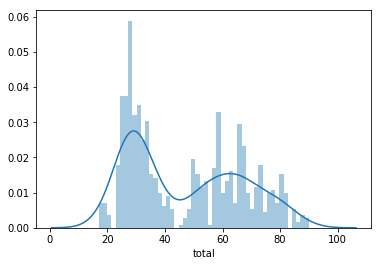

In [60]:
sns.distplot(y['total'],bins=50)

In [61]:
def efficiency(col):
    if col <= 40:
        return('High')
    elif (col > 40) & (col <=75):
        return('Average')
    else:
        return('Low')
    
y['efficiency'] = y['total'].apply(efficiency)

In [62]:
label = y['efficiency']
label = pd.get_dummies(label)

In [63]:
X_train, X_test, label_train, label_test = train_test_split(X, label, test_size=0.1, random_state=101)

In [64]:
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu', kernel_initializer='normal'))
model.add(Dense(4,activation='relu', kernel_initializer='normal'))
model.add(Dense(3,activation='sigmoid', kernel_initializer='normal'))

In [65]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
model.fit(X_train, label_train, epochs = 300, batch_size = 10)

Epoch 1/300
691/691 [==============================] - 0s 514us/step - loss: 0.6697 - acc: 0.5822
Epoch 2/300
691/691 [==============================] - 0s 91us/step - loss: 0.5933 - acc: 0.6541
Epoch 3/300
691/691 [==============================] - 0s 100us/step - loss: 0.5744 - acc: 0.6667
Epoch 4/300
691/691 [==============================] - 0s 100us/step - loss: 0.5738 - acc: 0.6667
Epoch 5/300
691/691 [==============================] - 0s 103us/step - loss: 0.5736 - acc: 0.6667
Epoch 6/300
691/691 [==============================] - 0s 103us/step - loss: 0.5733 - acc: 0.6667
Epoch 7/300
691/691 [==============================] - 0s 106us/step - loss: 0.5733 - acc: 0.6667
Epoch 8/300
691/691 [==============================] - 0s 102us/step - loss: 0.5737 - acc: 0.6739
Epoch 9/300
691/691 [==============================] - 0s 102us/step - loss: 0.5729 - acc: 0.6667
Epoch 10/300
691/691 [==============================] - 0s 104us/step - loss: 0.5730 - acc: 0.6667
Epoch 11/300
691/691

691/691 [==============================] - 0s 102us/step - loss: 0.2192 - acc: 0.9194
Epoch 166/300
691/691 [==============================] - 0s 103us/step - loss: 0.2190 - acc: 0.9209
Epoch 167/300
691/691 [==============================] - 0s 100us/step - loss: 0.2214 - acc: 0.9165
Epoch 168/300
691/691 [==============================] - 0s 96us/step - loss: 0.2209 - acc: 0.9170
Epoch 169/300
691/691 [==============================] - 0s 96us/step - loss: 0.2175 - acc: 0.9199
Epoch 170/300
691/691 [==============================] - 0s 100us/step - loss: 0.2208 - acc: 0.9199
Epoch 171/300
691/691 [==============================] - 0s 106us/step - loss: 0.2191 - acc: 0.9165
Epoch 172/300
691/691 [==============================] - 0s 102us/step - loss: 0.2172 - acc: 0.9185
Epoch 173/300
691/691 [==============================] - 0s 102us/step - loss: 0.2190 - acc: 0.9175
Epoch 174/300
691/691 [==============================] - 0s 101us/step - loss: 0.2179 - acc: 0.9175
Epoch 175/300
69

691/691 [==============================] - 0s 107us/step - loss: 0.2127 - acc: 0.9146
Epoch 248/300
691/691 [==============================] - 0s 104us/step - loss: 0.2105 - acc: 0.9214
Epoch 249/300
691/691 [==============================] - 0s 104us/step - loss: 0.2120 - acc: 0.9165
Epoch 250/300
691/691 [==============================] - 0s 107us/step - loss: 0.2141 - acc: 0.9093
Epoch 251/300
691/691 [==============================] - 0s 112us/step - loss: 0.2169 - acc: 0.9098
Epoch 252/300
691/691 [==============================] - 0s 110us/step - loss: 0.2114 - acc: 0.9204
Epoch 253/300
691/691 [==============================] - 0s 104us/step - loss: 0.2102 - acc: 0.9238
Epoch 254/300
691/691 [==============================] - 0s 106us/step - loss: 0.2120 - acc: 0.9223
Epoch 255/300
691/691 [==============================] - 0s 99us/step - loss: 0.2140 - acc: 0.9151
Epoch 256/300
691/691 [==============================] - 0s 102us/step - loss: 0.2154 - acc: 0.9137
Epoch 257/300
6

In [67]:
# evaluate the model
scores = model.evaluate(X_test, label_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

77/77 [==============================] - 0s 247us/step

acc: 93.51%


In [68]:
predict_y = model.predict(X_test)

In [69]:
predict = pd.DataFrame(predict_y,columns=['y1_pred','y2_pred','y3_pred'])

In [70]:
def label_pred (row):
    if row['y1_pred']>0.5:
        return 'Average'
    elif row['y2_pred']>0.5:
        return 'High'
    elif row['y3_pred']>0.5:
        return 'Low'
    
predict['label_predicted'] = predict.apply (lambda row: label_pred (row),axis=1)

In [71]:
predict.head()

,y1_pred,y2_pred,y3_pred,label_predicted
0,0.021544,0.953741,0.000245,High
1,0.025971,0.961261,0.000385,High
2,0.039470,0.974171,0.001070,High
3,0.801914,0.007315,0.225270,Average
4,0.710580,0.037916,0.211037,Average


### ANN Regression

In [72]:
# create model
model1 = Sequential()
model1.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
model1.add(Dense(3, kernel_initializer = 'normal', activation = 'relu'))
model1.add(Dense(1, kernel_initializer='normal'))

In [73]:
# Compile model
model1.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [74]:
model1.fit(X_train_scaled, y1_train, epochs = 200, batch_size = 20)

Epoch 1/200
691/691 [==============================] - 0s 386us/step - loss: 600.2147 - mean_squared_error: 600.2147
Epoch 2/200
691/691 [==============================] - 0s 42us/step - loss: 597.4614 - mean_squared_error: 597.4614
Epoch 3/200
691/691 [==============================] - 0s 41us/step - loss: 591.8593 - mean_squared_error: 591.8593
Epoch 4/200
691/691 [==============================] - 0s 45us/step - loss: 580.9231 - mean_squared_error: 580.9231
Epoch 5/200
691/691 [==============================] - 0s 46us/step - loss: 561.4029 - mean_squared_error: 561.4029
Epoch 6/200
691/691 [==============================] - 0s 45us/step - loss: 529.4328 - mean_squared_error: 529.4328
Epoch 7/200
691/691 [==============================] - 0s 48us/step - loss: 482.6427 - mean_squared_error: 482.6427
Epoch 8/200
691/691 [==============================] - 0s 48us/step - loss: 422.3920 - mean_squared_error: 422.3920
Epoch 9/200
691/691 [==============================] - 0s 45us/step - l

691/691 [==============================] - 0s 46us/step - loss: 9.1648 - mean_squared_error: 9.1648
Epoch 144/200
691/691 [==============================] - 0s 46us/step - loss: 9.1592 - mean_squared_error: 9.1592
Epoch 145/200
691/691 [==============================] - 0s 45us/step - loss: 9.1619 - mean_squared_error: 9.1619
Epoch 146/200
691/691 [==============================] - 0s 48us/step - loss: 9.1876 - mean_squared_error: 9.1876
Epoch 147/200
691/691 [==============================] - 0s 46us/step - loss: 9.1617 - mean_squared_error: 9.1617
Epoch 148/200
691/691 [==============================] - 0s 45us/step - loss: 9.1640 - mean_squared_error: 9.1640
Epoch 149/200
691/691 [==============================] - 0s 44us/step - loss: 9.1555 - mean_squared_error: 9.1555
Epoch 150/200
691/691 [==============================] - 0s 48us/step - loss: 9.1833 - mean_squared_error: 9.1833
Epoch 151/200
691/691 [==============================] - 0s 46us/step - loss: 9.1461 - mean_squared_er

In [75]:
y1_train_predict = model1.predict(X_train_scaled)
y1_test_predict = model1.predict(X_test_scaled)

print('y1 Train r2: {:.3f}'.format(r2_score(y1_train, y1_train_predict)))
print('y1 Test r2: {:.3f}'.format(r2_score(y1_test, y1_test_predict)))

y1 Train r2: 0.910
y1 Test r2: 0.915


In [76]:
# create model
model2 = Sequential()
model2.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
model2.add(Dense(3, kernel_initializer = 'normal', activation = 'relu'))
model2.add(Dense(1, kernel_initializer='normal'))

In [77]:
# Compile model
model2.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [78]:
model2.fit(X_train_scaled, y2_train, epochs = 300, batch_size = 20)

Epoch 1/300
691/691 [==============================] - 0s 411us/step - loss: 695.3715 - mean_squared_error: 695.3715
Epoch 2/300
691/691 [==============================] - 0s 43us/step - loss: 692.4741 - mean_squared_error: 692.4741
Epoch 3/300
691/691 [==============================] - 0s 44us/step - loss: 686.1369 - mean_squared_error: 686.1369
Epoch 4/300
691/691 [==============================] - 0s 46us/step - loss: 672.7779 - mean_squared_error: 672.7779
Epoch 5/300
691/691 [==============================] - 0s 45us/step - loss: 648.4861 - mean_squared_error: 648.4861
Epoch 6/300
691/691 [==============================] - 0s 46us/step - loss: 610.5732 - mean_squared_error: 610.5732
Epoch 7/300
691/691 [==============================] - 0s 45us/step - loss: 556.8903 - mean_squared_error: 556.8903
Epoch 8/300
691/691 [==============================] - 0s 49us/step - loss: 488.1906 - mean_squared_error: 488.1906
Epoch 9/300
691/691 [==============================] - 0s 49us/step - l

691/691 [==============================] - 0s 46us/step - loss: 11.6739 - mean_squared_error: 11.6739
Epoch 73/300
691/691 [==============================] - 0s 48us/step - loss: 11.6000 - mean_squared_error: 11.6000
Epoch 74/300
691/691 [==============================] - 0s 46us/step - loss: 11.5481 - mean_squared_error: 11.5481
Epoch 75/300
691/691 [==============================] - 0s 46us/step - loss: 11.4961 - mean_squared_error: 11.4961
Epoch 76/300
691/691 [==============================] - 0s 46us/step - loss: 11.4771 - mean_squared_error: 11.4771
Epoch 77/300
691/691 [==============================] - 0s 46us/step - loss: 11.4462 - mean_squared_error: 11.4462
Epoch 78/300
691/691 [==============================] - 0s 44us/step - loss: 11.4545 - mean_squared_error: 11.4545
Epoch 79/300
691/691 [==============================] - 0s 45us/step - loss: 11.4257 - mean_squared_error: 11.4257
Epoch 80/300
691/691 [==============================] - 0s 45us/step - loss: 11.4247 - mean_s

691/691 [==============================] - 0s 46us/step - loss: 11.1244 - mean_squared_error: 11.1244
Epoch 212/300
691/691 [==============================] - 0s 48us/step - loss: 11.1172 - mean_squared_error: 11.1172
Epoch 213/300
691/691 [==============================] - 0s 46us/step - loss: 11.1797 - mean_squared_error: 11.1797
Epoch 214/300
691/691 [==============================] - 0s 46us/step - loss: 11.1805 - mean_squared_error: 11.1805
Epoch 215/300
691/691 [==============================] - 0s 49us/step - loss: 11.1103 - mean_squared_error: 11.1103
Epoch 216/300
691/691 [==============================] - 0s 49us/step - loss: 11.1272 - mean_squared_error: 11.1272
Epoch 217/300
691/691 [==============================] - 0s 51us/step - loss: 11.1209 - mean_squared_error: 11.1209
Epoch 218/300
691/691 [==============================] - 0s 51us/step - loss: 11.1189 - mean_squared_error: 11.1189
Epoch 219/300
691/691 [==============================] - 0s 46us/step - loss: 11.1061 

In [79]:
y2_train_predict = model2.predict(X_train_scaled)
y2_test_predict = model2.predict(X_test_scaled)

print('y2 Train r2: {:.3f}'.format(r2_score(y2_train, y2_train_predict)))
print('y2 Test r2: {:.3f}'.format(r2_score(y2_test, y2_test_predict)))

y2 Train r2: 0.877
y2 Test r2: 0.894
